In [1]:
# These are the standard imports for CS 111
# This list may change as the quarter goes on

import os
import time
import math
import numpy as np
import numpy.linalg as npla
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import cs111

In [2]:
# Some global variables.
HEIGHT = WIDTH = 64

################# Useful functions to go from images to vectors and back #################
imageToVector = lambda Bitmap: Bitmap.reshape( -1 ).astype( np.float64 )
vectorToImage = lambda Vector: Vector.clip( 0, 255 ).reshape( HEIGHT, WIDTH ).astype( np.uint8 )
renderVector = lambda Vector: plt.imshow( vectorToImage( Vector ), cmap="gray" )
scaleImageIntensities = lambda A: np.round( (A - np.min( A )) / (np.max( A ) - np.min( A )) * 255 ).astype( np.uint8 )
##########################################################################################

Shape of male is: (73, 4096)
Shape of female is: (96, 4096)


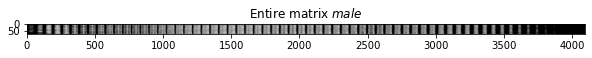

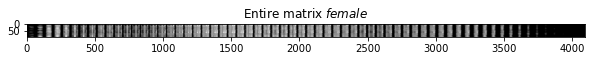

In [3]:
#1 Loading all faces from faces file and sorting by Male versus Female

#import the face_description file to check the gender property per file.
import face_descriptions 

male = [] # First we make the list, then convert to a matrix 
female = [] # First we make the list, then convert to a matrix

for fileName in sorted( face_descriptions.face_features ):
    if fileName not in face_descriptions.image_to_omit:
        bitMap = plt.imread( "faces/" + fileName )
        if (face_descriptions.face_features[fileName][0] == "Male"):
            male.append(imageToVector( bitMap ))
        else:
            female.append(imageToVector( bitMap ))
            
male = np.array( male )          # Now male is a matrix.
female = np.array( female )          # Now female is a matrix.


print( "Shape of male is:", male.shape )
print( "Shape of female is:", female.shape )


plt.figure( figsize=(10, 3) )
plt.title( r"Entire matrix $male$" )
plt.imshow( male, cmap="gray" )

plt.figure( figsize=(10, 3) )
plt.title( r"Entire matrix $female$" )
plt.imshow( female, cmap="gray" )

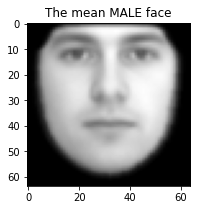

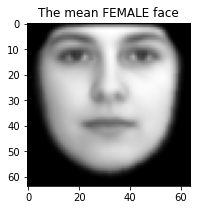

In [4]:
#2 Calculate and Render Mean Faces for both male and female

maleMean = np.mean( male, axis=0 )   # Notice the axis=0 parameter!
femaleMean = np.mean( female, axis=0 )   # Notice the axis=0 parameter!

# Plotting resulting mean face.
plt.figure( figsize=(3,3) )
plt.title( r"The mean MALE face" )
renderVector( maleMean )

plt.figure( figsize=(3,3) )
plt.title( r"The mean FEMALE face" )
renderVector( femaleMean )

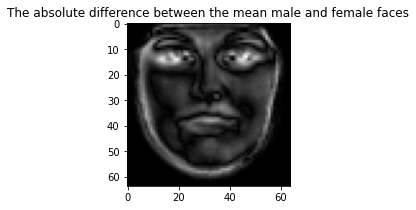

In [5]:
#3 Calculate the absolute difference between the mean male and mean female face
#  Then render the normalized (0 - 255) image of the that difference.

def scaleImageIntensities( A ):
    return np.round((A - np.min( A ))/(np.max( A ) - np.min( A )) * 255).astype(np.uint8)

d = np.abs(maleMean - femaleMean)
plt.figure( figsize=(3,3) )
plt.title( r"The absolute difference between the mean male and female faces" )
renderVector( scaleImageIntensities(d) )

Shape of cov(Xmale): (4096, 4096)
Shape of cov(Xfemale): (4096, 4096)


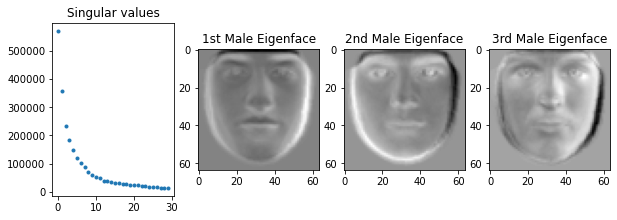

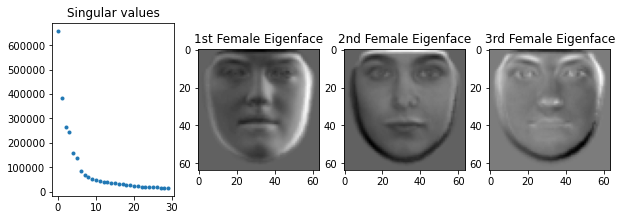

In [6]:
#4 Compute the eigenfaces for both male and females
#  Render the top three Eigenfaces for both genders

Xmale = male - maleMean 
Xfemale = female - femaleMean    

# Compute the covariance matrix of the the centered data.
Cmale = np.cov( Xmale.T )
Cfemale = np.cov(Xfemale.T)
print( "Shape of cov(Xmale):", Cmale.shape )
print( "Shape of cov(Xfemale):", Cfemale.shape )

# Perform PCA on C using the SVD.
Umale, sigmaMale, Vtmale = spla.svd( Cmale )
maleEigenfaces = Vtmale.T

Ufemale, sigmaFemale, Vtfemale = spla.svd( Cfemale )
femaleEigenfaces = Vtfemale.T

# Let's look at the first largest k eigen/singular values.
k = 30

# Plotting eigenfaces and the explained variance for first k singular values.
fig = plt.figure( figsize=(10,7) )
plt.subplot( 241 )
plt.title( "Singular values" )
plt.plot( sigmaMale[:k], "." )
plt.subplot( 242 )
plt.title( "1st Male Eigenface" )
renderVector( scaleImageIntensities( maleEigenfaces[:,0] ) )
plt.subplot( 243 )
plt.title( "2nd Male Eigenface" )
renderVector( scaleImageIntensities( maleEigenfaces[:,1] ) )
plt.subplot( 244 )
plt.title( "3rd Male Eigenface" )
renderVector( scaleImageIntensities( maleEigenfaces[:,2] ) )

# Plotting eigenfaces and the explained variance for first k singular values.
fig = plt.figure( figsize=(10,7) )
plt.subplot( 245 )
plt.title( "Singular values" )
plt.plot( sigmaFemale[:k], "." )
plt.subplot( 246 )
plt.title( "1st Female Eigenface" )
renderVector( scaleImageIntensities( femaleEigenfaces[:,0] ) )
plt.subplot( 247 )
plt.title( "2nd Female Eigenface" )
renderVector( scaleImageIntensities( femaleEigenfaces[:,1] ) )
plt.subplot( 248 )
plt.title( "3rd Female Eigenface" )
renderVector( scaleImageIntensities( femaleEigenfaces[:,2] ) )


List of k Randomly Generated Values: 
[-0.58361114 -0.43477893  1.0152222   2.0645543  -0.64675263  0.26879116
 -0.71182054  0.53838039  0.60454613 -0.51535299 -1.38155903 -0.5939292
 -0.08043525 -2.33395185  1.07640639  3.58694778 -0.7417661   0.23917014
  1.84466933 -1.04375329]


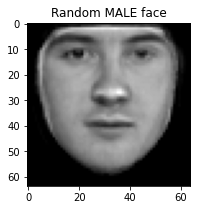

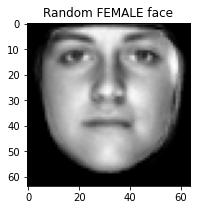

In [7]:
#5 Generate a "good looking" male face and a "good Looking" female face with k = 20

############## Generating a random face from the cookbook ##############
k = 20

maleCoeffs = Xmale @ maleEigenfaces[:,:k]            
maleMU = np.mean( maleCoeffs, axis=0 )           
maleSTD = np.std( maleCoeffs, ddof=1, axis=0 )   

femaleCoeffs = Xfemale @ femaleEigenfaces[:,:k]           
femaleMU = np.mean( femaleCoeffs, axis=0 )          
femaleSTD = np.std( femaleCoeffs, ddof=1, axis=0 )  

rand = np.random.randn( k )
print("\nList of k Randomly Generated Values: ")
print(rand)
newMaleFaceCoeffs = maleSTD * rand + maleMU  
newMaleFace = maleMean + maleEigenfaces[:,:k] @ newMaleFaceCoeffs

newFemaleFaceCoeffs = femaleSTD * rand + femaleMU 
newFemaleFace = femaleMean + femaleEigenfaces[:,:k] @ newFemaleFaceCoeffs  

# Plotting new random face.
plt.figure( figsize=(3,3) )
plt.title( "Random MALE face" )
renderVector( newMaleFace )

plt.figure( figsize=(3,3) )
plt.title( "Random FEMALE face" )
renderVector( newFemaleFace )

In [8]:
print( "Variance from function:" )       # Checking that the variances on coefficients should be the same
print( maleSTD ** 2 )                        # as the singular values!
print( "\nVariance from SVD:" )
print( sigmaMale[:k] )

print( "\nVariance from function:" )       # Checking that the variances on coefficients should be the same
print( femaleSTD ** 2 )                        # as the singular values!
print( "\nVariance from SVD:" )
print( sigmaFemale[:k] )

Variance from function:
[570962.71191133 356642.49304171 233842.20354333 183310.27659351
 148568.90168747 118106.86349523 100734.91093012  86412.23673618
  71051.27297169  58256.89217028  53234.15131243  47674.33659985
  39709.98815021  36543.61392978  34263.85864388  31950.91046694
  29691.77024052  28582.95041952  26277.4462548   25546.07096582]

Variance from SVD:
[570962.71191133 356642.49304171 233842.20354332 183310.27659351
 148568.90168747 118106.86349523 100734.91093012  86412.23673618
  71051.27297169  58256.89217028  53234.15131243  47674.33659985
  39709.98815021  36543.61392978  34263.85864388  31950.91046694
  29691.77024052  28582.95041952  26277.4462548   25546.07096582]

Variance from function:
[660094.31527404 384736.17855541 263558.26286283 245865.64389124
 158231.72301094 135617.95303267  85528.00089092  66564.80402673
  61300.93348268  52521.13175357  45391.59720592  44911.76790744
  40991.94376917  37118.94426571  35348.57740199  33060.50306238
  31143.04504602  2